## Quais fatores socioeconômicos impactam na expectativa de vida das pessoas?

### Instalando e Carregando os Pacotes

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Vesões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Wellington Costa"

Author: Wellington Costa



### Carregando e Compreendendo os Dados

In [3]:
# Carregando os dados
df_dados = pd.read_csv('dataset.csv')

In [4]:
df_dados.shape

(2938, 22)

In [5]:
df_dados.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
# Amostra dos dados
df_dados.sample(10)

Country  Year      Status  Life expectancy   \
2853                           Vanuatu  2004  Developing              69.6   
657                               Cuba  2015  Developing              79.1   
1600                          Malaysia  2001  Developing              72.7   
494                           Cameroon  2001  Developing              51.5   
515           Central African Republic  2012  Developing              53.0   
2199  Saint Vincent and the Grenadines  2000  Developing              79.0   
1222        Iran (Islamic Republic of)  2011  Developing              74.7   
2745                           Ukraine  2000  Developing              67.5   
1642                             Malta  2007   Developed              79.6   
1828                             Nepal  2000  Developing              62.5   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2853            169.0              0     0.85              334.167337   
657              92.0              1      NaN                0.000000   
1600            144.0              4     0.53              210.241700   
494              41.0             61     4.43               41.736292   
515             439.0             16     0.01                7.344808   
2199            186.0              0     4.80                0.000000   
1222             93.0             22     0.03                0.000000   
2745            257.0              6     4.49                7.883791   
1642             65.0              0     7.45             2578.888314   
1828            238.0             46     0.08               17.912337   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
2853         63.0         0  ...   67.0               4.12         69.0   
657          99.0         0  ...   99.0                NaN         99.0   
1600         95.0      2198  ...   95.0               3.40         96.0   
494           NaN     23934  ...   61.0               4.70         63.0   
515          47.0       141  ...   47.0               3.62         47.0   
2199          NaN         0  ...   99.0               3.73         98.0   
1222         99.0        73  ...   99.0               7.12         99.0   
2745          4.0       817  ...   99.0               5.59         99.0   
1642         82.0         2  ...   76.0               8.36         74.0   
1828          NaN      9397  ...   74.0               5.43         74.0   

       HIV/AIDS           GDP   Population   thinness  1-19 years  \
2853        0.1   1787.947230      24143.0                    1.6   
657         0.1    762.261218          NaN                    3.5   
1600        0.1   3915.115460    2369897.0                    9.7   
494         7.9    614.672934   15671927.0                    7.5   
515         5.1    486.411140     449416.0                    8.7   
2199        0.7           NaN          NaN                    4.0   
1222        0.1           NaN          NaN                    7.9   
2745        0.7    635.789635   49175848.0                    3.0   
1642        0.1  19375.569600      46724.0                    0.7   
1828        0.1    231.425540    2374911.0                   18.5   

       thinness 5-9 years  Income composition of resources  Schooling  
2853                  1.5                            0.000       10.7  
657                   3.3                            0.773       13.9  
1600                  9.4                            0.725       11.9  
494                   7.7                            0.437        7.1  
515                   8.6                            0.366        7.1  
2199                  3.9                            0.000       12.7  
1222                  8.1                            0.745       13.1  
2745                  3.1                            0.669       13.3  
1642                  0.7                            0.808       14.4  
1828                 19.2                            0.439    

### Ajuste Inicial nos Dados

In [7]:
# Colunas
df_dados.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# Criando um novo dataset e ajustando o nome das variáveis
# Estou desconsiderando algumas varáveis:
# percentage expenditure, under-five deaths e Income composition of resources não estão sendo consideradas
# Essas variáveis não apresentam descrição clara na fonte de dados e por isso estão sendo removidas da análise
df = pd.DataFrame({'country': df_dados['Country'],
                   'life_expectancy': df_dados['Life expectancy '],
                   'year': df_dados['Year'],
                   'status': df_dados['Status'],
                   'adult_mortality': df_dados['Adult Mortality'],
                   'inf_death': df_dados['infant deaths'],
                   'alcohol': df_dados['Alcohol'],
                   'hepatitisB': df_dados['Hepatitis B'],
                   'measles': df_dados['Measles '],
                   'bmi': df_dados[' BMI '],
                   'polio': df_dados['Polio'],
                   'diphtheria': df_dados['Diphtheria '],
                   'hiv': df_dados[' HIV/AIDS'],
                   'gdp': df_dados['GDP'],
                   'total_expenditure': df_dados['Total expenditure'],
                   'thinness_till19': df_dados[' thinness  1-19 years'],
                   'thinnes_till9': df_dados[' thinness 5-9 years'],
                   'school': df_dados['Schooling'],
                   'population': df_dados[' Population']
})

In [9]:
# Tipos de dados
df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinnes_till9        float64
school               float64
population           float64
dtype: object

In [10]:
df.sample(10)

country  life_expectancy  year      status  adult_mortality  \
1619         Mali             57.8  2014  Developing            272.0   
897      Ethiopia             51.2  2000  Developing            391.0   
229       Belarus             73.0  2010  Developing            222.0   
1695       Mexico             75.0  2003  Developing            127.0   
1734   Montenegro             75.8  2013  Developing             19.0   
2682       Turkey             75.5  2014  Developing             17.0   
2037  Philippines             66.8  2001  Developing            221.0   
799       Ecuador             73.6  2002  Developing            157.0   
1820        Nepal             67.0  2008  Developing            189.0   
1165      Hungary             72.9  2004   Developed             18.0   

      inf_death  alcohol  hepatitisB  measles   bmi  polio  diphtheria  hiv  \
1619         52     0.01        73.0      290  23.2   74.0        73.0  1.6   
897         253     0.88         NaN     1660  12.3   55.0         3.0  5.0   
229           0    14.44        96.0        1  59.3   99.0        98.0  0.1   
1695         46     4.88        98.0       44  54.9   98.0        98.0  0.1   
1734          0     0.01         9.0        0   6.7   94.0        94.0  0.1   
2682         16     1.45        96.0      565  65.3   96.0        96.0  0.1   
2037         68     4.54        45.0     7360  18.3   76.0        79.0  0.1   
799           8     3.88        75.0        0  45.1   88.0        88.0  0.3   
1820         27     0.21        82.0     2089  15.4   82.0        82.0  0.2   
1165          1    13.28         NaN        0  58.2   99.0        99.0  0.1   

               gdp  total_expenditure  thinness_till19  thinnes_till9  school  \
1619    825.572991               6.86              7.9            7.7     8.2   
897     123.876257               4.36             11.9           11.8     3.9   
229      63.388770               5.55              2.0            2.2    15.5   
1695   6751.998987               6.20              1.9            1.8    11.9   
1734   7186.429787               6.43              1.8            1.9    15.1   
2682  12127.225220               5.41              4.9            4.7    14.5   
2037    957.287441               3.00              1.0            9.7    11.4   
799    2183.966796               4.62              1.5            1.4    12.5   
1820    473.844449               6.44             17.0           17.6    10.1   
1165   1259.526600               8.80              2.1            2.1    15.3   

      population  
1619  16962846.0  
897   66537331.0  
229     949583.0  
1695   1564453.0  
1734     62127.0  
2682    773628.0  
2037  79665315.0  
799      13726.0  
1820  26475859.0  
1165    117146.0

### Análise Exploratória

In [11]:
# Cria um dicionário com a descrição de cada variáveis
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [12]:
# Agora é só consultar sempre que tiver dúvidas sobre cada variável
df_dict['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

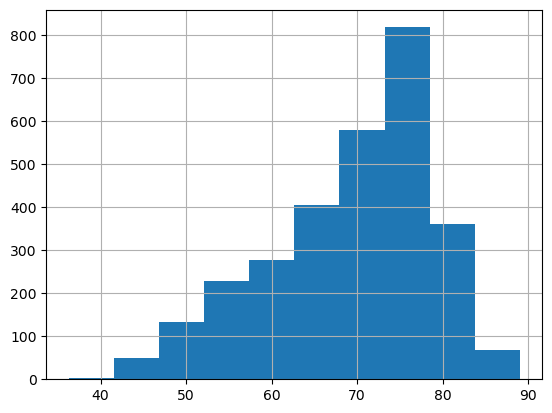

In [13]:
# Plot do histograma da variável alvo (variável quantitativa)
df['life_expectancy'].hist();

In [14]:
# Resumo estatístico (variáveis numéricas)
df.describe()

life_expectancy         year  adult_mortality    inf_death  \
count      2928.000000  2938.000000      2928.000000  2938.000000   
mean         69.224932  2007.518720       164.796448    30.303948   
std           9.523867     4.613841       124.292079   117.926501   
min          36.300000  2000.000000         1.000000     0.000000   
25%          63.100000  2004.000000        74.000000     0.000000   
50%          72.100000  2008.000000       144.000000     3.000000   
75%          75.700000  2012.000000       228.000000    22.000000   
max          89.000000  2015.000000       723.000000  1800.000000   

           alcohol   hepatitisB        measles          bmi        polio  \
count  2744.000000  2385.000000    2938.000000  2904.000000  2919.000000   
mean      4.602861    80.940461    2419.592240    38.321247    82.550188   
std       4.052413    25.070016   11467.272489    20.044034    23.428046   
min       0.010000     1.000000       0.000000     1.000000     3.000000   
25%       0.877500    77.000000       0.000000    19.300000    78.000000   
50%       3.755000    92.000000      17.000000    43.500000    93.000000   
75%       7.702500    97.000000     360.250000    56.200000    97.000000   
max      17.870000    99.000000  212183.000000    87.300000    99.000000   

        diphtheria          hiv            gdp  total_expenditure  \
count  2919.000000  2938.000000    2490.000000         2712.00000   
mean     82.324084     1.742103    7483.158469            5.93819   
std      23.716912     5.077785   14270.169342            2.49832   
min       2.000000     0.100000       1.681350            0.37000   
25%      78.000000     0.100000     463.935626            4.26000   
50%      93.000000     0.100000    1766.947595            5.75500   
75%      97.000000     0.800000    5910.806335            7.49250   
max      99.000000    50.600000  119172.741800           17.60000   

       thinness_till19  thinnes_till9       school    population  
count      2904.000000    2904.000000  2775.000000  2.286000e+03  
mean          4.839704       4.870317    11.992793  1.275338e+07  
std           4.420195       4.508882     3.358920  6.101210e+07  
min           0.100000       0.100000     0.000000  3.400000e+01  
25%           1.600000       1.500000    10.100000  1.957932e+05  
50%           3.300000       3.300000    12.300000  1.386542e+06  
75%           7.200000       7.200000    14.300000  7.420359e+06  
max          27.700000      28.600000    20.700000  1.293859e+09

In [15]:
# Resumo estatístico (variáveis categóricas)
df.describe(include=['object'])

country      status
count          2938        2938
unique          193           2
top     Afghanistan  Developing
freq             16        2426

In [16]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = 'reg', height = 3)

    return

In [17]:
# Variável alvo
alvo = ['life_expectancy']

In [18]:
# Vamos usar alguns atributos
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

In [19]:
# Descrição da variável
df_dict['population']

'População total do país.'

In [20]:
# Descrição da variável
df_dict['hepatitisB']

'Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).'

In [21]:
# Descrição da variável
df_dict['gdp']

'Produto Interno Bruto per capita (em dólares americanos).'

In [22]:
# Descrição da variável
df_dict['total_expenditure']

'Gasto total em saúde como porcentagem do PIB.'

In [23]:
# Descrição da variável
df_dict['alcohol']

'Consumo de álcool per capita (litros de álcool puro por ano).'

In [24]:
# Descrição da variável
df_dict['school']

'Número médio de anos de escolaridade.'

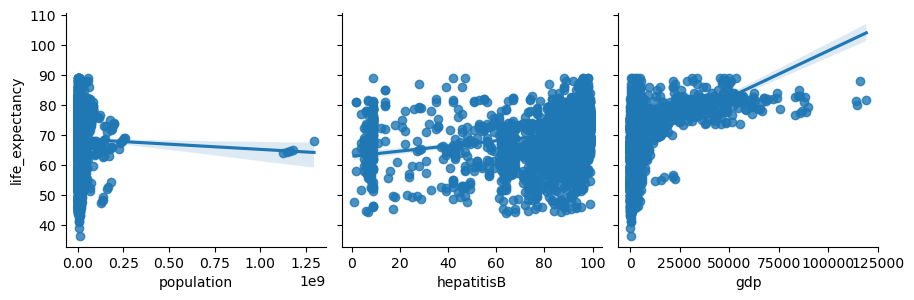

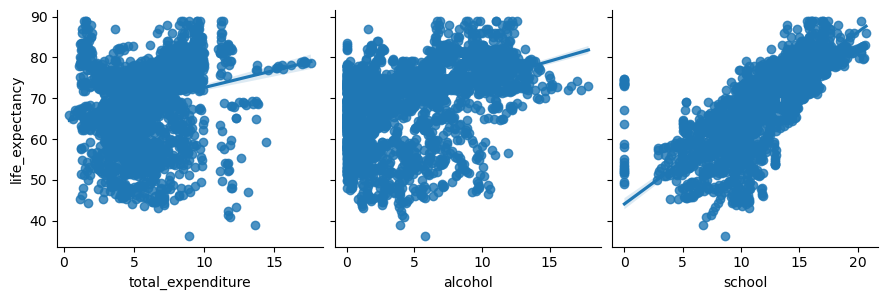

In [25]:
# Verificando outliers
get_pairs(df, alvo, atributos, 3)

- > Valores ausentes é um problema tem que ser identificado e tratado
- > O valor outlier (valor extremo) pode ser ou não um problema

### Detectando Valores Ausentes

In [26]:
# Visualizando o total de linhas por coluna
df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinnes_till9        2904
school               2775
population           2286
dtype: int64

In [27]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df.isnull().sum().sort_values(ascending = False)

In [28]:
print(valores_ausentes)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinnes_till9         34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64


In [29]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df.shape[0]

In [30]:
print(f'{valores_ausentes_percent * 100} %')

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinnes_till9         1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


### Detectando Outliers
Vamos começar olhando para as variáveis que têm o maior percentual de valores ausentes.

In [31]:
# Atributos com mais de 5% de valores missing
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

In [32]:
# Cria um novo dataframe
novo_dataframe = df[atributos]

In [33]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

In [34]:
# Definir outliers como aqueles valores que estão fora do intervalo [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]
outliers = (( novo_dataframe < (Q1 - 1.5 * IQR )) | (novo_dataframe > (Q3 + 1.5 * IQR ))).sum()

In [35]:
# Total de outliers
outliers

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [36]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame( {'Outliers': outliers, 'Percentual': (outliers / len(novo_dataframe)) * 100} )

In [37]:
# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['Outliers'] > 0]

Outliers  Percentual
population              294   10.006807
hepatitisB              254    8.645337
gdp                     365   12.423417
total_expenditure        32    1.089176
school                   44    1.497617

### Análise Estatística Para Tratamento de Outliers

In [38]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [39]:
# Filtrando os outliers
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis=1)]

Considerações Importantes:
 - A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
 - A escolha do multiplicador(1.5) pode variar em diferentes contextos e conjuntos de dados.
 - É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
 - Outras técnicas para identificar outliers podem ser utilizadas em conjuntos com a regra IQR.

In [40]:
# shape
novo_df.shape

(2044, 19)

In [41]:
# Resumo estatístico
novo_df.describe()

life_expectancy         year  adult_mortality    inf_death  \
count      2036.000000  2044.000000      2036.000000  2044.000000   
mean         68.261444  2007.516634       173.697937    21.272016   
std           9.180601     4.620838       124.821601    75.877341   
min          36.300000  2000.000000         1.000000     0.000000   
25%          62.475000  2003.000000        83.750000     0.000000   
50%          71.400000  2008.000000       154.000000     3.000000   
75%          74.700000  2012.000000       235.000000    17.000000   
max          89.000000  2015.000000       723.000000  1800.000000   

           alcohol   hepatitisB        measles          bmi        polio  \
count  1908.000000  1653.000000    2044.000000  2032.000000  2041.000000   
mean      4.250854    88.543860    2043.051859    37.229429    83.469868   
std       3.821064    11.667147   11166.996177    19.540099    22.293545   
min       0.010000    47.000000       0.000000     1.000000     3.000000   
25%       0.847500    84.000000       0.000000    19.200000    78.000000   
50%       3.400000    93.000000      10.000000    41.300000    93.000000   
75%       6.725000    97.000000     256.250000    54.900000    97.000000   
max      17.310000    99.000000  212183.000000    87.300000    99.000000   

        diphtheria          hiv           gdp  total_expenditure  \
count  2041.000000  2044.000000   1668.000000        1883.000000   
mean     84.229789     1.906115   2603.414714           5.817047   
std      20.802376     5.353430   3051.987902           2.167468   
min       3.000000     0.100000      3.685949           0.370000   
25%      81.000000     0.100000    387.645945           4.380000   
50%      93.000000     0.100000   1312.038142           5.710000   
75%      97.000000     1.000000   3936.450613           7.130000   
max      99.000000    50.300000  13893.187680          12.250000   

       thinness_till19  thinnes_till9       school    population  
count      2032.000000    2032.000000  1910.000000  1.550000e+03  
mean          4.973327       5.039813    11.779791  2.862564e+06  
std           4.070398       4.188165     2.893174  4.147575e+06  
min           0.100000       0.100000     3.800000  3.400000e+01  
25%           1.900000       1.900000    10.100000  1.413295e+05  
50%           3.550000       3.600000    12.100000  8.968025e+05  
75%           7.325000       7.400000    13.700000  3.712494e+06  
max          27.700000      28.600000    20.400000  1.789956e+07

In [42]:
# Valor máximo da população
novo_df.population.max()

17899562.0

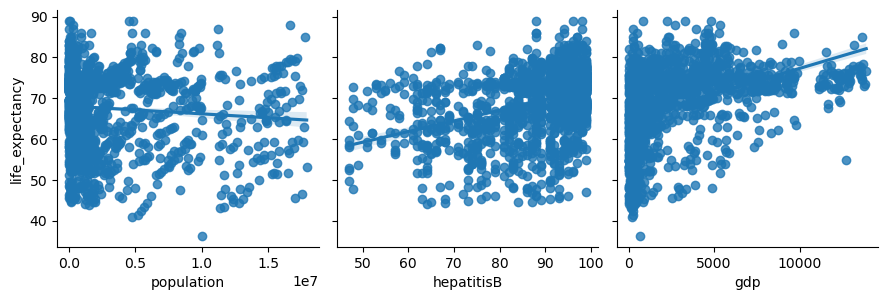

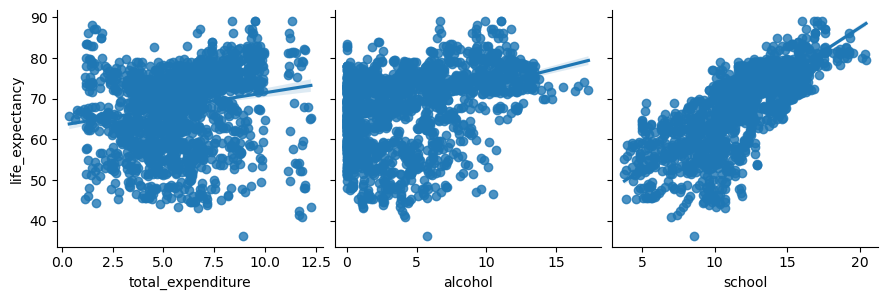

In [43]:
# Verificando outliers
get_pairs(novo_df, alvo, atributos, 3)

## Análise Estatística Para Tratamento de Valores Ausentes

In [44]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [45]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0]
print(f'{valores_ausentes_percent * 100} %')

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinnes_till9         0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64 %


In [46]:
# Função para o Replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [47]:
novo_df.describe()

life_expectancy         year  adult_mortality    inf_death  \
count      2036.000000  2044.000000      2036.000000  2044.000000   
mean         68.261444  2007.516634       173.697937    21.272016   
std           9.180601     4.620838       124.821601    75.877341   
min          36.300000  2000.000000         1.000000     0.000000   
25%          62.475000  2003.000000        83.750000     0.000000   
50%          71.400000  2008.000000       154.000000     3.000000   
75%          74.700000  2012.000000       235.000000    17.000000   
max          89.000000  2015.000000       723.000000  1800.000000   

           alcohol   hepatitisB        measles          bmi        polio  \
count  1908.000000  1653.000000    2044.000000  2032.000000  2041.000000   
mean      4.250854    88.543860    2043.051859    37.229429    83.469868   
std       3.821064    11.667147   11166.996177    19.540099    22.293545   
min       0.010000    47.000000       0.000000     1.000000     3.000000   
25%       0.847500    84.000000       0.000000    19.200000    78.000000   
50%       3.400000    93.000000      10.000000    41.300000    93.000000   
75%       6.725000    97.000000     256.250000    54.900000    97.000000   
max      17.310000    99.000000  212183.000000    87.300000    99.000000   

        diphtheria          hiv           gdp  total_expenditure  \
count  2041.000000  2044.000000   1668.000000        1883.000000   
mean     84.229789     1.906115   2603.414714           5.817047   
std      20.802376     5.353430   3051.987902           2.167468   
min       3.000000     0.100000      3.685949           0.370000   
25%      81.000000     0.100000    387.645945           4.380000   
50%      93.000000     0.100000   1312.038142           5.710000   
75%      97.000000     1.000000   3936.450613           7.130000   
max      99.000000    50.300000  13893.187680          12.250000   

       thinness_till19  thinnes_till9       school    population  
count      2032.000000    2032.000000  1910.000000  1.550000e+03  
mean          4.973327       5.039813    11.779791  2.862564e+06  
std           4.070398       4.188165     2.893174  4.147575e+06  
min           0.100000       0.100000     3.800000  3.400000e+01  
25%           1.900000       1.900000    10.100000  1.413295e+05  
50%           3.550000       3.600000    12.100000  8.968025e+05  
75%           7.325000       7.400000    13.700000  3.712494e+06  
max          27.700000      28.600000    20.400000  1.789956e+07

In [48]:
# Removendo valores missing (Diferentes formas de notação do lado esquerdo do sinal de igual)
novo_df.loc[:, 'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitisB'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)
novo_df.gdp = novo_df['gdp'].transform(impute_median)
novo_df.school = novo_df['school'].transform(impute_median)

In [49]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [50]:
# Verificando o total de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0]
print(f'{valores_ausentes_percent * 100} %')

bmi                0.587084
thinnes_till9      0.587084
thinness_till19    0.587084
adult_mortality    0.391389
life_expectancy    0.391389
diphtheria         0.146771
polio              0.146771
dtype: float64 %


In [51]:
# Removendo registros com valores nulos
novo_df.dropna(inplace = True)

In [52]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [53]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0]
print(f'{valores_ausentes_percent * 100}%')

Series([], dtype: float64)%


In [54]:
# Shape
novo_df.shape

(2023, 19)

In [55]:
novo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinnes_till9      2023 non-n

- Usarei indicadores socioeconômicos independentes de identificação do país. Irei remover as variáveis catégoricas.

In [56]:
# Drop das variáveis
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

In [57]:
# Shape do dataset original
df.shape

(2938, 19)

In [58]:
# Shape do dataset após a limpeza 
novo_df.shape

(2023, 17)

## Engenharia de Recursos (Feature Engineering)
> Como há diferença muito grande de população entre os países usar essa variável pode ser arriscado. Vamos criar uma nova variável e categorizar os países em um de 3 faixas possíveis de população,.

In [59]:
novo_df.head()

life_expectancy  year  adult_mortality  inf_death  alcohol  hepatitisB  \
1             59.9  2014            271.0         64     0.01        62.0   
3             59.5  2012            272.0         69     0.01        67.0   
4             59.2  2011            275.0         71     0.01        68.0   
5             58.8  2010            279.0         74     0.01        66.0   
6             58.6  2009            281.0         77     0.01        63.0   

   measles   bmi  polio  diphtheria  hiv         gdp  total_expenditure  \
1      492  18.6   58.0        62.0  0.1  612.696514               8.18   
3     2787  17.6   67.0        67.0  0.1  669.959000               8.52   
4     3013  17.2   68.0        68.0  0.1   63.537231               7.87   
5     1989  16.7   66.0        66.0  0.1  553.328940               9.20   
6     2861  16.2   63.0        63.0  0.1  445.893298               9.42   

   thinness_till19  thinnes_till9  school  population  
1             17.5           17.5    10.0    327582.0  
3             17.9           18.0     9.8   3696958.0  
4             18.2           18.2     9.5   2978599.0  
5             18.4           18.4     9.2   2883167.0  
6             18.6           18.7     8.9    284331.0

In [60]:
novo_df.population.min()

34.0

In [61]:
novo_df.population.max()

17899562.0

In [62]:
# Criamos os pontos de corte (cutoffs) com 2 percentis como referência
pontos_corte = [novo_df.population.quantile(0.33), novo_df.population.quantile(0.67)]

In [63]:
pontos_corte

[656519.86, 1365811.6]

In [64]:
# Criamos uma nova variável com todos os valores preenchidos com 1
novo_df['pop_size'] = 1

In [65]:
# Definimos a faixa onde a variável terá o valor 2 
novo_df.loc[(novo_df.population < pontos_corte[1]) & (novo_df.population > pontos_corte[0]), 'pop_size'] = 2

In [66]:
# Definimos a faixa onde a variável terá o valor 3
novo_df.loc[novo_df.population >= pontos_corte[1], 'pop_size'] = 3

In [67]:
# Dataset
novo_df.head()

life_expectancy  year  adult_mortality  inf_death  alcohol  hepatitisB  \
1             59.9  2014            271.0         64     0.01        62.0   
3             59.5  2012            272.0         69     0.01        67.0   
4             59.2  2011            275.0         71     0.01        68.0   
5             58.8  2010            279.0         74     0.01        66.0   
6             58.6  2009            281.0         77     0.01        63.0   

   measles   bmi  polio  diphtheria  hiv         gdp  total_expenditure  \
1      492  18.6   58.0        62.0  0.1  612.696514               8.18   
3     2787  17.6   67.0        67.0  0.1  669.959000               8.52   
4     3013  17.2   68.0        68.0  0.1   63.537231               7.87   
5     1989  16.7   66.0        66.0  0.1  553.328940               9.20   
6     2861  16.2   63.0        63.0  0.1  445.893298               9.42   

   thinness_till19  thinnes_till9  school  population  pop_size  
1             17.5           17.5    10.0    327582.0         1  
3             17.9           18.0     9.8   3696958.0         3  
4             18.2           18.2     9.5   2978599.0         3  
5             18.4           18.4     9.2   2883167.0         3  
6             18.6           18.7     8.9    284331.0         1

In [68]:
novo_df.pop_size.value_counts()

pop_size
2    687
1    668
3    668
Name: count, dtype: int64

> As variáveis alcohol e bmi têm uma relação direta e natural. Vamos criar uma nova variável chamada life_style com a combinação dessas duas variáveis.

In [69]:
# Criando a nova variável
novo_df['lifestyle'] = 0
novo_df.lifestyle = novo_df['bmi'] * novo_df['alcohol']

In [70]:
novo_df.head()

life_expectancy  year  adult_mortality  inf_death  alcohol  hepatitisB  \
1             59.9  2014            271.0         64     0.01        62.0   
3             59.5  2012            272.0         69     0.01        67.0   
4             59.2  2011            275.0         71     0.01        68.0   
5             58.8  2010            279.0         74     0.01        66.0   
6             58.6  2009            281.0         77     0.01        63.0   

   measles   bmi  polio  diphtheria  hiv         gdp  total_expenditure  \
1      492  18.6   58.0        62.0  0.1  612.696514               8.18   
3     2787  17.6   67.0        67.0  0.1  669.959000               8.52   
4     3013  17.2   68.0        68.0  0.1   63.537231               7.87   
5     1989  16.7   66.0        66.0  0.1  553.328940               9.20   
6     2861  16.2   63.0        63.0  0.1  445.893298               9.42   

   thinness_till19  thinnes_till9  school  population  pop_size  lifestyle  
1             17.5           17.5    10.0    327582.0         1      0.186  
3             17.9           18.0     9.8   3696958.0         3      0.176  
4             18.2           18.2     9.5   2978599.0         3      0.172  
5             18.4           18.4     9.2   2883167.0         3      0.167  
6             18.6           18.7     8.9    284331.0         1      0.162

In [71]:
novo_df.lifestyle.describe()

count    2023.000000
mean      178.996408
std       209.416553
min         0.018000
25%        18.140500
50%        95.323000
75%       257.394000
max      1036.869000
Name: lifestyle, dtype: float64

In [72]:
# Verificando se há valores ausentes
missing_values = novo_df.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy      0
hiv                  0
pop_size             0
population           0
school               0
thinnes_till9        0
thinness_till19      0
total_expenditure    0
gdp                  0
diphtheria           0
year                 0
polio                0
bmi                  0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
lifestyle            0
dtype: int64

In [73]:
novo_df.dtypes

life_expectancy      float64
year                   int64
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinnes_till9        float64
school               float64
population           float64
pop_size               int64
lifestyle            float64
dtype: object

## Análise de Correlação Para Verificar Multicolinearidade
Queremos que as variáveis preditoras tenham uma alta correlaçãocom a variável alvo, mas não queremos que as variáveis tenham alta
correlação entre si. Se houver alta correlação entre as variáveis preditoras isso é chamado de multicolineariedade e fere uma das suposições da regressão.

A correlação é uma medida da relação entre as variáveis. O coeficiente de correlação é um valor de -1 a +1, sendo:

**-1 indica alta correlação negativa.**

**+1 indica alta correlação positiva.**

**0 indica que não há correlação.**

Correlação não implica causalidade. Por exemplo: *Sempre que aumenta o consumo de sorvete aumenta a presença de tubarões na praia.* Provavelmente ambos os eventos ocorrem no verão e estão correlacionados, mas isso não significa que um evento causa o outro. Para afirma isso teríamos que fazer uma análise de causalidade.

In [74]:
# Correlação das variáveis numéricas no conjunto de dados
novo_df.corr()

life_expectancy      year  adult_mortality  inf_death  \
life_expectancy           1.000000  0.204556        -0.658916  -0.206443   
year                      0.204556  1.000000        -0.091760  -0.059838   
adult_mortality          -0.658916 -0.091760         1.000000   0.099370   
inf_death                -0.206443 -0.059838         0.099370   1.000000   
alcohol                   0.342425 -0.066639        -0.149204  -0.127545   
hepatitisB                0.257860 -0.003178        -0.188950  -0.122515   
measles                  -0.115350 -0.064347         0.035432   0.480129   
bmi                       0.557954  0.096763        -0.366745  -0.221948   
polio                     0.452564  0.147489        -0.228938  -0.183569   
diphtheria                0.483659  0.228939        -0.221803  -0.183910   
hiv                      -0.573127 -0.158820         0.512978   0.039115   
gdp                       0.360736  0.170945        -0.197863  -0.120331   
total_expenditure         0.175738  0.070267        -0.090963  -0.121871   
thinness_till19          -0.433580 -0.059353         0.299104   0.321487   
thinnes_till9            -0.429357 -0.055950         0.302507   0.354512   
school                    0.708272  0.219471        -0.383901  -0.214215   
population               -0.105317  0.020981         0.096768   0.111901   
pop_size                 -0.117333  0.013190         0.123785   0.111776   
lifestyle                 0.441366 -0.017373        -0.231128  -0.156769   

                    alcohol  hepatitisB   measles       bmi     polio  \
life_expectancy    0.342425    0.257860 -0.115350  0.557954  0.452564   
year              -0.066639   -0.003178 -0.064347  0.096763  0.147489   
adult_mortality   -0.149204   -0.188950  0.035432 -0.366745 -0.228938   
inf_death         -0.127545   -0.122515  0.480129 -0.221948 -0.183569   
alcohol            1.000000    0.193844 -0.045324  0.310448  0.187916   
hepatitisB         0.193844    1.000000 -0.043089  0.115409  0.393191   
measles           -0.045324   -0.043089  1.000000 -0.142187 -0.110853   
bmi                0.310448    0.115409 -0.142187  1.000000  0.253961   
polio              0.187916    0.393191 -0.110853  0.253961  1.000000   
diphtheria         0.199958    0.391270 -0.123043  0.273612  0.676507   
hiv               -0.036268   -0.090390  0.024412 -0.244626 -0.143756   
gdp                0.289360    0.167829 -0.065666  0.323198  0.198453   
total_expenditure  0.262657    0.046093 -0.101675  0.200959  0.141294   
thinness_till19   -0.386629   -0.086406  0.133515 -0.541904 -0.166819   
thinnes_till9     -0.379482   -0.102546  0.137056 -0.550691 -0.166363   
school             0.464657    0.263879 -0.089084  0.552766  0.382712   
population        -0.007040   -0.056455 -0.005326 -0.056945 -0.045542   
pop_size           0.002445   -0.028477  0.017013 -0.041854 -0.041742   
lifestyle          0.878858    0.181579 -0.085123  0.599062  0.219793   

                   diphtheria       hiv       gdp  total_expenditure  \
life_expectancy      0.483659 -0.573127  0.360736           0.175738   
year                 0.228939 -0.158820  0.170945           0.070267   
adult_mortality     -0.221803  0.512978 -0.197863          -0.090963   
inf_death           -0.183910  0.039115 -0.120331          -0.121871   
alcohol              0.199958 -0.036268  0.289360           0.262657   
hepatitisB           0.391270 -0.090390  0.167829           0.046093   
measles             -0.123043  0.024412 -0.065666          -0.101675   
bmi                  0.273612 -0.244626  0.323198           0.200959   
polio                0.676507 -0.143756  0.198453           0.141294   
diphtheria           1.000000 -0.154179  0.222266           0.157976   
hiv                 -0.154179  1.000000 -0.118378           0.009678   
gdp                  0.222266 -0.118378  1.000000           0.065364   
total_expenditure    0.157976  0.009678  0.065364           1.000000   
thinness_till19     -0.189487

In [75]:
df_dict['bmi']

'Índice médio de massa corporal da população adulta.'

In [76]:
# Filtrando a matriz de correlação
dfCorr = novo_df.corr()
df_filtro_1 = dfCorr[((dfCorr >= 0.3) | (dfCorr <= -0.3)) & (dfCorr != 1.000)]
df_filtro_1

life_expectancy  year  adult_mortality  inf_death  \
life_expectancy                NaN   NaN        -0.658916        NaN   
year                           NaN   NaN              NaN        NaN   
adult_mortality          -0.658916   NaN              NaN        NaN   
inf_death                      NaN   NaN              NaN        NaN   
alcohol                   0.342425   NaN              NaN        NaN   
hepatitisB                     NaN   NaN              NaN        NaN   
measles                        NaN   NaN              NaN   0.480129   
bmi                       0.557954   NaN        -0.366745        NaN   
polio                     0.452564   NaN              NaN        NaN   
diphtheria                0.483659   NaN              NaN        NaN   
hiv                      -0.573127   NaN         0.512978        NaN   
gdp                       0.360736   NaN              NaN        NaN   
total_expenditure              NaN   NaN              NaN        NaN   
thinness_till19          -0.433580   NaN              NaN   0.321487   
thinnes_till9            -0.429357   NaN         0.302507   0.354512   
school                    0.708272   NaN        -0.383901        NaN   
population                     NaN   NaN              NaN        NaN   
pop_size                       NaN   NaN              NaN        NaN   
lifestyle                 0.441366   NaN              NaN        NaN   

                    alcohol  hepatitisB   measles       bmi     polio  \
life_expectancy    0.342425         NaN       NaN  0.557954  0.452564   
year                    NaN         NaN       NaN       NaN       NaN   
adult_mortality         NaN         NaN       NaN -0.366745       NaN   
inf_death               NaN         NaN  0.480129       NaN       NaN   
alcohol                 NaN         NaN       NaN  0.310448       NaN   
hepatitisB              NaN         NaN       NaN       NaN  0.393191   
measles                 NaN         NaN       NaN       NaN       NaN   
bmi                0.310448         NaN       NaN       NaN       NaN   
polio                   NaN    0.393191       NaN       NaN       NaN   
diphtheria              NaN    0.391270       NaN       NaN  0.676507   
hiv                     NaN         NaN       NaN       NaN       NaN   
gdp                     NaN         NaN       NaN  0.323198       NaN   
total_expenditure       NaN         NaN       NaN       NaN       NaN   
thinness_till19   -0.386629         NaN       NaN -0.541904       NaN   
thinnes_till9     -0.379482         NaN       NaN -0.550691       NaN   
school             0.464657         NaN       NaN  0.552766  0.382712   
population              NaN         NaN       NaN       NaN       NaN   
pop_size                NaN         NaN       NaN       NaN       NaN   
lifestyle          0.878858         NaN       NaN  0.599062       NaN   

                   diphtheria       hiv       gdp  total_expenditure  \
life_expectancy      0.483659 -0.573127  0.360736                NaN   
year                      NaN       NaN       NaN                NaN   
adult_mortality           NaN  0.512978       NaN                NaN   
inf_death                 NaN       NaN       NaN                NaN   
alcohol                   NaN       NaN       NaN                NaN   
hepatitisB           0.391270       NaN       NaN                NaN   
measles                   NaN       NaN       NaN                NaN   
bmi                       NaN       NaN  0.323198                NaN   
polio                0.676507       NaN       NaN                NaN   
diphtheria                NaN       NaN       NaN                NaN   
hiv                       NaN       NaN       NaN                NaN   
gdp                       NaN       NaN       NaN                NaN   
total_expenditure         NaN       NaN       NaN                NaN   
thinness_till19           NaN       NaN       NaN                NaN   
thinnes_till9             NaN       N

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso critério. São as variáveis preditoras com maior correlação com a variável alvo.

Agora devemos checar uma das suposições da Regressão Linear e identificar possíveis problemas de multicolineariedade (alta correlação entre as variáveis preditoras). Com base nesse critério eliminamos uma de duas variáveis preditoras altamente correlacionadas. Vamos considerar 0.65 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

In [77]:
# Filtrando a matriz de correlação
dfCorr = novo_df.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.65) | (dfCorr <= -0.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=1)
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=0)
df_filtro_2

year  adult_mortality  inf_death   alcohol  hepatitisB  \
year                NaN              NaN        NaN       NaN         NaN   
adult_mortality     NaN              NaN        NaN       NaN         NaN   
inf_death           NaN              NaN        NaN       NaN         NaN   
alcohol             NaN              NaN        NaN       NaN         NaN   
hepatitisB          NaN              NaN        NaN       NaN         NaN   
measles             NaN              NaN        NaN       NaN         NaN   
bmi                 NaN              NaN        NaN       NaN         NaN   
polio               NaN              NaN        NaN       NaN         NaN   
diphtheria          NaN              NaN        NaN       NaN         NaN   
hiv                 NaN              NaN        NaN       NaN         NaN   
gdp                 NaN              NaN        NaN       NaN         NaN   
total_expenditure   NaN              NaN        NaN       NaN         NaN   
thinness_till19     NaN              NaN        NaN       NaN         NaN   
thinnes_till9       NaN              NaN        NaN       NaN         NaN   
school              NaN              NaN        NaN       NaN         NaN   
population          NaN              NaN        NaN       NaN         NaN   
pop_size            NaN              NaN        NaN       NaN         NaN   
lifestyle           NaN              NaN        NaN  0.878858         NaN   

                   measles  bmi     polio  diphtheria  hiv  gdp  \
year                   NaN  NaN       NaN         NaN  NaN  NaN   
adult_mortality        NaN  NaN       NaN         NaN  NaN  NaN   
inf_death              NaN  NaN       NaN         NaN  NaN  NaN   
alcohol                NaN  NaN       NaN         NaN  NaN  NaN   
hepatitisB             NaN  NaN       NaN         NaN  NaN  NaN   
measles                NaN  NaN       NaN         NaN  NaN  NaN   
bmi                    NaN  NaN       NaN         NaN  NaN  NaN   
polio                  NaN  NaN       NaN    0.676507  NaN  NaN   
diphtheria             NaN  NaN  0.676507         NaN  NaN  NaN   
hiv                    NaN  NaN       NaN         NaN  NaN  NaN   
gdp                    NaN  NaN       NaN         NaN  NaN  NaN   
total_expenditure      NaN  NaN       NaN         NaN  NaN  NaN   
thinness_till19        NaN  NaN       NaN         NaN  NaN  NaN   
thinnes_till9          NaN  NaN       NaN         NaN  NaN  NaN   
school                 NaN  NaN       NaN         NaN  NaN  NaN   
population             NaN  NaN       NaN         NaN  NaN  NaN   
pop_size               NaN  NaN       NaN         NaN  NaN  NaN   
lifestyle              NaN  NaN       NaN         NaN  NaN  NaN   

                   total_expenditure  thinness_till19  thinnes_till9  school  \
year                             NaN              NaN            NaN     NaN   
adult_mortality                  NaN              NaN            NaN     NaN   
inf_death                        NaN              NaN            NaN     NaN   
alcohol                          NaN              NaN            NaN     NaN   
hepatitisB                       NaN              NaN            NaN     NaN   
measles                          NaN              NaN            NaN     NaN   
bmi                              NaN              NaN            NaN     NaN   
polio                            NaN              NaN            NaN     NaN   
diphtheria                       NaN              NaN            NaN     NaN   
hiv                              NaN              NaN            NaN     NaN   
gdp                              NaN              NaN            NaN     NaN   
total_expenditure                NaN              NaN            NaN     NaN   
thinness_till19                  NaN              NaN       0.946814     NaN   
thinnes_till9                    NaN         0.946814            NaN     NaN   
school                           NaN              NaN            NaN     NaN   
p

> Observe a alta correlação entre algumas variáveis preditoras.

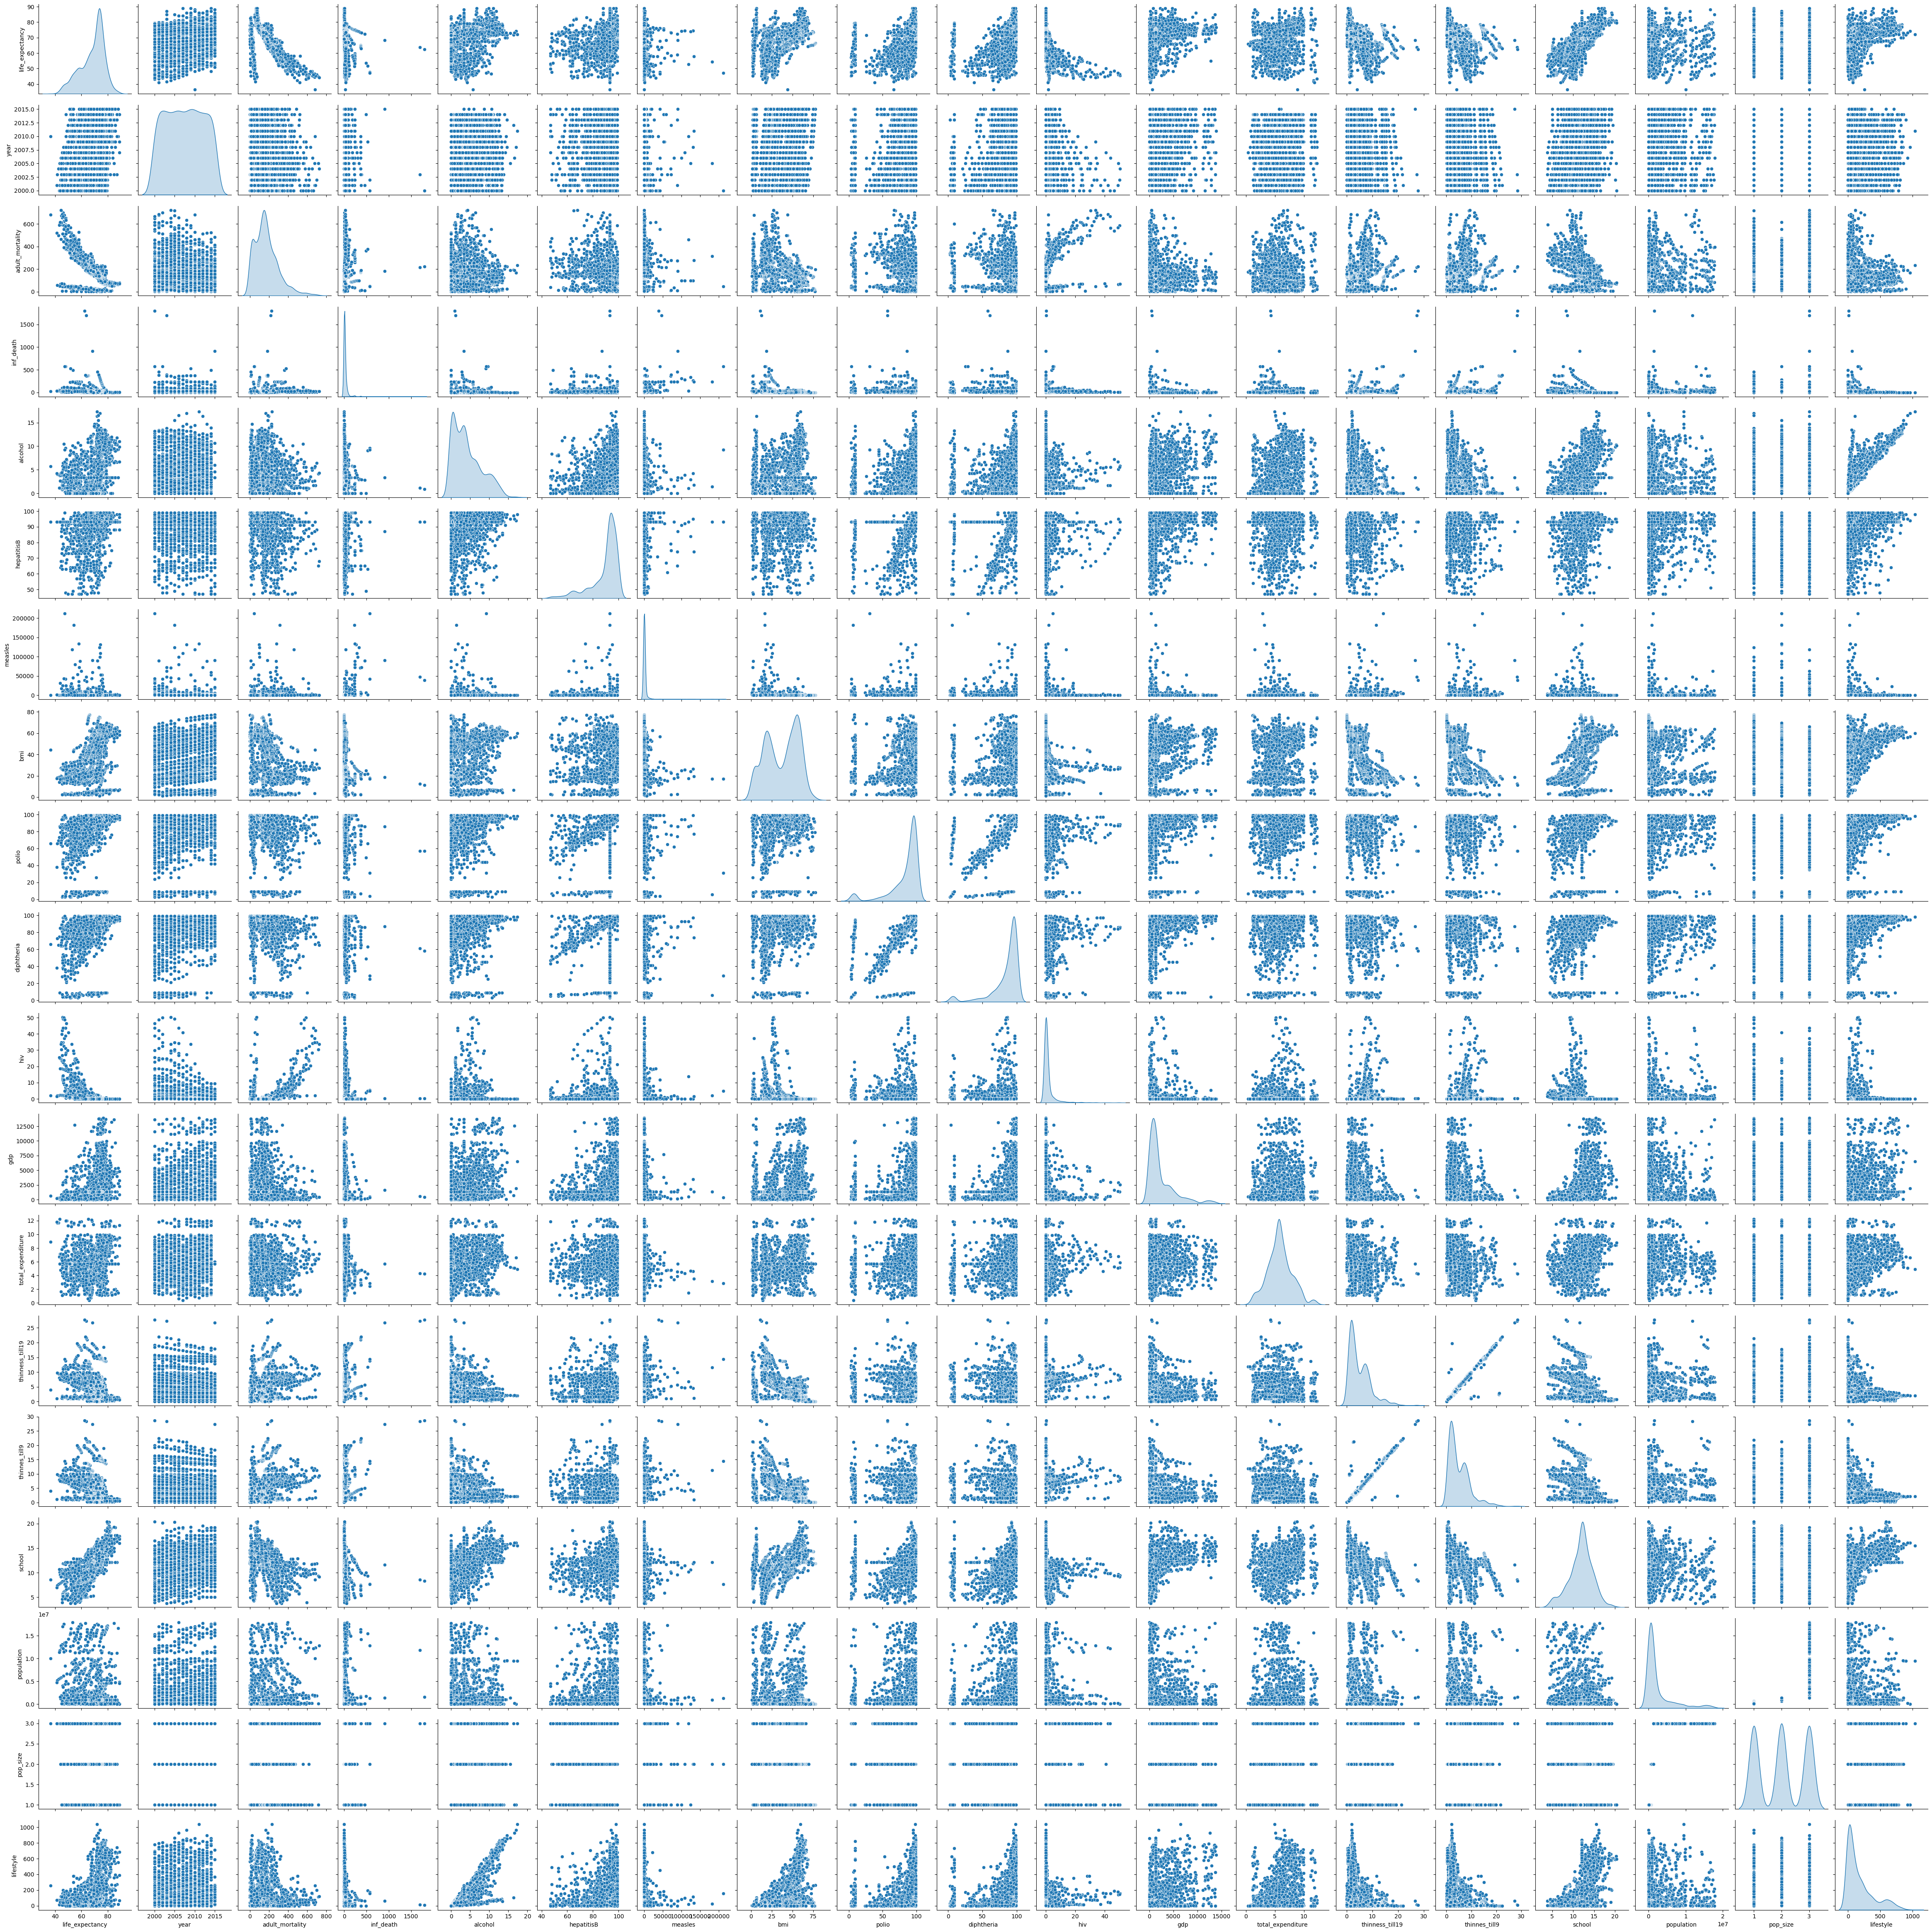

In [78]:
# Checando a correlação entre as variáveis
sns.pairplot(novo_df, diag_kind = 'kde', height = 2.5);

### Decisão 
**Primeiro Filtro - Correlação com a Variável Alvo**

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

**Segundo Filtro - Multicolinearidade**

Com base no filtro de muticolinearidade, as variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

**Terceiro Filtro - Compreensão dos Dados, do Problema de Negócio e entrega dos Resultados**

Embora a variável bmi tenha maior correlação com a variável alvo do que a variável lifestyle, esta segunda carrega informação de duas variáveis (alcohol e bmi). Por essa razão, vamos destacar a variável bmi e manter a variável lifestyle. Isso também evita alguma multicolinearidade entre as duas variáveis, além de facilitar a entrega do resultado ao tomador de decisão.

Nota: Manter a variável bmi ao invés da variável lifestyle também é uma decisão válida! Fiz isso e a conclusão da modelagem estatística é a mesma!


In [79]:
# Preparando o novo dataset
df_final = pd.DataFrame({'life_expectancy': novo_df['life_expectancy'],
                        'adult_mortality': novo_df['adult_mortality'],
                        'diphtheria': novo_df['diphtheria'],
                        'hiv': novo_df['hiv'],
                        'gdp': novo_df['gdp'],
                        'thinness_till19': novo_df['thinness_till19'],
                        'school': novo_df['school'],
                        'lifestyle':novo_df['lifestyle']})

In [80]:
df_final.head()

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
1             59.9            271.0        62.0  0.1  612.696514   
3             59.5            272.0        67.0  0.1  669.959000   
4             59.2            275.0        68.0  0.1   63.537231   
5             58.8            279.0        66.0  0.1  553.328940   
6             58.6            281.0        63.0  0.1  445.893298   

   thinness_till19  school  lifestyle  
1             17.5    10.0      0.186  
3             17.9     9.8      0.176  
4             18.2     9.5      0.172  
5             18.4     9.2      0.167  
6             18.6     8.9      0.162

In [81]:
# Verifica se há valores ausentes
missing_values = df_final.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy    0
adult_mortality    0
diphtheria         0
hiv                0
gdp                0
thinness_till19    0
school             0
lifestyle          0
dtype: int64

In [82]:
# Visualiza o total de linhas por coluna
df_final.count()

life_expectancy    2023
adult_mortality    2023
diphtheria         2023
hiv                2023
gdp                2023
thinness_till19    2023
school             2023
lifestyle          2023
dtype: int64

In [83]:
# Checando multicolinearidade e removendo variáveis altamente correlacionadas
corr_map = df_final.corr()
corr_map

life_expectancy  adult_mortality  diphtheria       hiv  \
life_expectancy         1.000000        -0.658916    0.483659 -0.573127   
adult_mortality        -0.658916         1.000000   -0.221803  0.512978   
diphtheria              0.483659        -0.221803    1.000000 -0.154179   
hiv                    -0.573127         0.512978   -0.154179  1.000000   
gdp                     0.360736        -0.197863    0.222266 -0.118378   
thinness_till19        -0.433580         0.299104   -0.189487  0.212890   
school                  0.708272        -0.383901    0.430627 -0.232993   
lifestyle               0.441366        -0.231128    0.225132 -0.132152   

                      gdp  thinness_till19    school  lifestyle  
life_expectancy  0.360736        -0.433580  0.708272   0.441366  
adult_mortality -0.197863         0.299104 -0.383901  -0.231128  
diphtheria       0.222266        -0.189487  0.430627   0.225132  
hiv             -0.118378         0.212890 -0.232993  -0.132152  
gdp              1.000000        -0.211979  0.460247   0.333733  
thinness_till19 -0.211979         1.000000 -0.424922  -0.449094  
school           0.460247        -0.424922  1.000000   0.528939  
lifestyle        0.333733        -0.449094  0.528939   1.000000

In [84]:
# Função para o plotda matriz de correlação
def CorrMat(df, dropDuplicates = True, xrot = 70, yrot = 0, label = 'Variable'):

    # Excluir correlação duplicadas mascarando os valores à direita
    if dropDuplicates:
        mask = np.zeros_like(df, dtype = bool)
        mask[np.triu_indices_from(mask)] = True

    # Definir cor do plano de fundo / estilo do gráfico
    sns.set_style(style = 'dark')
    fig, ax = plt.subplots(figsize = (8, 8))

    # Adiciona mapa de cores do vermelho ao azul
    plt.title("Matriz de Correlação")

    # Desenha gráfico de correlação com ou sem duplicatas
    if dropDuplicates:
        sns.heatmap(df, mask = mask, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)

    else:
        sns.heatmap(df, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
    return


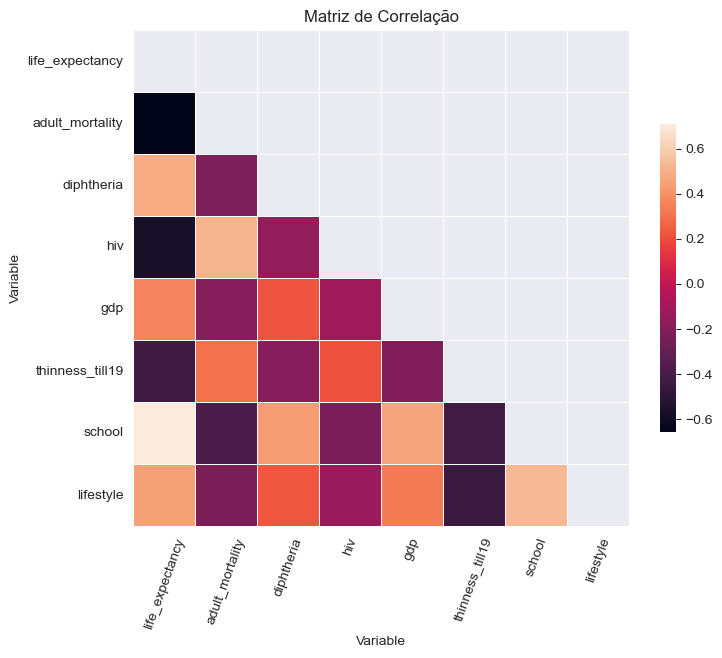

In [85]:
# Plot da matriz de correlação
CorrMat(corr_map)

In [86]:
# Dataset
df_final.head()

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
1             59.9            271.0        62.0  0.1  612.696514   
3             59.5            272.0        67.0  0.1  669.959000   
4             59.2            275.0        68.0  0.1   63.537231   
5             58.8            279.0        66.0  0.1  553.328940   
6             58.6            281.0        63.0  0.1  445.893298   

   thinness_till19  school  lifestyle  
1             17.5    10.0      0.186  
3             17.9     9.8      0.176  
4             18.2     9.5      0.172  
5             18.4     9.2      0.167  
6             18.6     8.9      0.162

In [87]:
# Dataset
df_final.dtypes

life_expectancy    float64
adult_mortality    float64
diphtheria         float64
hiv                float64
gdp                float64
thinness_till19    float64
school             float64
lifestyle          float64
dtype: object

In [88]:
df_final.shape

(2023, 8)

#### Modelagem Estatística
A modelagem estatística envolve a construção de modelos matemáticos que capturam as relações entre variáveis em um conjunto de dados. Esses modelos são então usados para entender como as variáveis estão relacionadas, a fim de tomar decisões informadas baseadas em análises. Aqui então
alguns pontos-chave sobre a modelagem estatística:

Componentes da Modelagem Estatística:

**Variáveis e Dados**: Coleção de dados que inclui a variáveil dependente (o que você quer explicar ou prever) e as variáveis independentes (fatores que você acredita que influenciam a variável dependente).

**Modelo Matemático**: Uma representação simplificada da realidade que expressa relações matemática entre variáveis. Os modelos podem variar de simples(como regressão linear) a complexas (como redes neurais).

**Estimação de Parâmetros**: O processo de ajuste do modelo aos dados, frequentemente usando métodos como o de Mínimos Quadrados Ordinários(OLS) para encontrar os valores dos parâmetros do modelo que melhor se ajustam aos dados observados.

**Diagnóstico e Validação**: Avaliação do modelo para verificar sua adequação, incluindo a análise dos resíduos, verificação de suposições e, possivelmente, a modificação do modelo para melhorar seu desempenho.

In [89]:
# Variável alvo x Variáveis Preditoras
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + gdp + thinness_till19 + school + lifestyle'

In [90]:
# Cria e treina o modelo
modelo_v1 = ols(formula, data = df_final).fit()

In [91]:
# Coeficiente de Determinação  quanto maior melhor
print(f"R-squared: {modelo_v1.rsquared}")

R-squared: 0.7737705044839867


In [92]:
# Coeficientes
print(f"Coeficientes:\n{modelo_v1.params}")

Coeficientes:
Intercept          51.016574
adult_mortality    -0.021286
diphtheria          0.079267
hiv                -0.484974
gdp                 0.000062
thinness_till19    -0.127453
school              1.289512
lifestyle           0.002567
dtype: float64


In [93]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     984.6
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:50:16   Log-Likelihood:                -5852.1
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2015   BIC:                         1.177e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.0166      0.667     76.474      0.000      49.708      52.325
adult_mortality    -0.0213      0.001    -22.068      0.000      -0.023      -0.019
diphtheria          0.0793      0.005     15.252      0.000       0.069       0.089
hiv                -0.4850      0.021    -22.928      0.000      -0.526      -0.443
gdp              6.181e-05   3.93e-05      1.574      0.116   -1.52e-05       0.000
thinness_till19    -0.1275      0.028     -4.546      0.000      -0.182      -0.072
school              1.2895      0.049     26.065      0.000       1.192       1.387
lifestyle           0.0026      0.001      4.451      0.000       0.001       0.004
==============================================================================
Omnibus:                      105.060   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.134
Skew:                          -0.383   Prob(JB):                     6.99e-43
Kurtosis:                       4.310   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> A variável gdp apresenta um valor-p superior a 0.05 e, portanto, não é estatisticamente significativa para explicara variável alvo. Vamos removê-la.

In [94]:
# Segunda versão do modelo de regressão
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + thinness_till19 + school + lifestyle'
modelo_v2 = ols(formula, data = df_final).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1147.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:50:16   Log-Likelihood:                -5853.3
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2016   BIC:                         1.176e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.8445      0.658     77.233      0.000      49.553      52.136
adult_mortality    -0.0213      0.001    -22.094      0.000      -0.023      -0.019
diphtheria          0.0795      0.005     15.299      0.000       0.069       0.090
hiv                -0.4850      0.021    -22.922      0.000      -0.527      -0.444
thinness_till19    -0.1266      0.028     -4.515      0.000      -0.182      -0.072
school              1.3132      0.047     27.859      0.000       1.221       1.406
lifestyle           0.0027      0.001      4.671      0.000       0.002       0.004
==============================================================================
Omnibus:                      108.281   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.828
Skew:                          -0.394   Prob(JB):                     4.05e-44
Kurtosis:                       4.323   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> A nota 2 acima. Parece haver multicolinearidade nos preditores. Podemos voltar e rever nosso critério de decisão e remover variáveis que estejam com correlação acima de 0.55 por exemplo (ao invés de usar 0.65 como usamos antes). Mas antes disso, vamos padronizar os dados e colocar tudo na mesma escala e avaliar o resultado.

In [95]:
# Variáveis que serão padronizadas
atributos = ['adult_mortality', 'diphtheria', 'hiv', 'thinness_till19', 'school', 'lifestyle']

In [96]:
# Padronização
scaler = StandardScaler()
scaler.fit(df_final[atributos])
scaler_features = scaler.transform(df_final[atributos])

In [97]:
# Criando um dataframe com dados padronizados
scaled_features_df = pd.DataFrame(scaler_features, columns = atributos, index = df_final.index)
scaled_features_df.head()

adult_mortality  diphtheria       hiv  thinness_till19    school  lifestyle
1         0.784288   -1.070929 -0.337999         3.076510 -0.658477  -0.854062
3         0.792299   -0.830592 -0.337999         3.174831 -0.730539  -0.854109
4         0.816331   -0.782525 -0.337999         3.248572 -0.838631  -0.854128
5         0.848374   -0.878660 -0.337999         3.297732 -0.946724  -0.854152
6         0.864395   -1.022861 -0.337999         3.346893 -1.054817  -0.854176

In [98]:
# Terceira versão do modelo
modelo_v3 = sm.OLS(endog = df_final['life_expectancy'],
                   exog = sm.add_constant(scaled_features_df.values)).fit()

In [99]:
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1147.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                        09:50:16   Log-Likelihood:                -5853.3
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2016   BIC:                         1.176e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.3059      0.097    702.041      0.000      68.115      68.497
x1            -2.6608      0.120    -22.094      0.000      -2.897      -2.425
x2             1.6541      0.108     15.299      0.000       1.442       1.866
x3            -2.6080      0.114    -22.922      0.000      -2.831      -2.385
x4            -0.5151      0.114     -4.515      0.000      -0.739      -0.291
x5             3.6447      0.131     27.859      0.000       3.388       3.901
x6             0.5602      0.120      4.671      0.000       0.325       0.795
==============================================================================
Omnibus:                      108.281   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.828
Skew:                          -0.394   Prob(JB):                     4.05e-44
Kurtosis:                       4.323   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Entrega do Resultado 

**Resumo da Análise de Expectativa de Vida**

Nossa análise utilizou um modelo estatístico para examinar como diversos fatores influenciam a expectativa de vida. Os resultados oferecem insights valiosos que podem orientar estratégias de saúde pública e alocação de recursos.

Principais Descobertas:

- Efetividade do Modelo: O modelo demonstrou ser bastante eficaz, explicando cerca de 77% das variações na expectativa de vida. Isso indica um alto grau de precisão na nossa capacidade de prever a expectativa de vida com base nos fatores analisados.

Impacto dos Fatores de Saúde e Estilo de Vida:

- Mortalidade Adulta e HIV: Como esperado, um aumento nos índices de mortalidade adulta e HIV está significativamente associado a uma diminuição na expectativa de vida. Estes resultados enfatizam a necessidade de continuar e reforçar os programas de saúde focados na redução da mortalidade e na luta contra o HIV.
- Educação e Estilo de Vida Saudável: Por outro lado, fatores positivos como níveis mais altos de educação e um estilo de vida saudável mostram uma associação forte com o aumento da expectativa de vida. Isso reforça a importância de investimentos em educação e promoção de estilos de vida saudáveis como parte integral das políticas de saúde pública.
- Vacinação e Nutrição: A análise também destacou a importância da vacinação (como a contra difteria) e da boa nutrição (indicada pela menor prevalência de magreza entre crianças e adolescentes) como fatores chave para a melhoria da expectativa de vida.

Recomendações:

- Foco em Prevenção: Reforçar programas de prevenção e tratamento para doenças críticas como HIV e melhorar a cobertura vacinal.
- Educação para Saúde: Investir em educação como um meio de promover estilos de vida saudáveis e melhorar os indicadores de saúde da população.
- Monitoramento e Avaliação: Continuar a monitorar esses fatores de saúde e ajustar as políticas públicas conforme necessário para atender às necessidades emergentes da população.

Conclusão:

Este estudo reafirma a importância de não apenas combater doenças, mas também de promover educação e estilos de vida saudáveis. As descobertas oferecem uma base sólida para decisões informadas que podem levar a melhorias significativas na saúde e na longevidade da população.

In [102]:
%reload_ext watermark
%watermark -a "Wellington Costa"

Author: Wellington Costa

